## 0. 데이터 불러오기

In [1]:
import pandas as pd
from pandas import DataFrame

file = 'C:\\Users\\user\\Desktop\\data\\code\\tone_data.csv'
data = pd.read_csv(file, header=None, names = ['person', 'gender', 'length(s)', 'jitter(%)', 'shimmer(%)'])

## 1. 전체 데이터
- 총 1000명(남성 500개, 여성 500개)
- 한 사람당 평균 29시간 분량의 한국어 강의 음성 파일
1. person: 발화자
2. gender: 발화자 성별
3. length(s): 음성파일 길이(초)
4. jitter(%): 목소리 높낮이 변화율
5. shimmer(%): 목소리 크기 변화율

In [2]:
data

,person,gender,length(s),jitter(%),shimmer(%)
0,1,여,2.888000,1.299649,7.520230
1,1,여,6.640062,2.241975,10.182180
2,1,여,8.730062,3.270172,14.466319
3,1,여,14.156750,2.071389,8.899486
4,1,여,20.660750,2.127786,11.031819
...,...,...,...,...,...
219738,1000,남,1467.538687,2.980504,13.736885
219739,1000,남,1474.488687,2.023322,15.046424
219740,1000,남,1484.374687,2.176574,14.530699
219741,1000,남,1500.148000,2.924516,15.592163


## 1-1. 음성 파일 길이가 10초 미만인 경우 삭제

In [3]:
less = data[data['length(s)']<10].index
data.drop(less, inplace=True)
data

,person,gender,length(s),jitter(%),shimmer(%)
3,1,여,14.156750,2.071389,8.899486
4,1,여,20.660750,2.127786,11.031819
5,1,여,28.818188,2.282524,9.913569
6,1,여,29.794875,1.022197,7.552501
7,1,여,32.814188,1.707622,9.096210
...,...,...,...,...,...
219738,1000,남,1467.538687,2.980504,13.736885
219739,1000,남,1474.488687,2.023322,15.046424
219740,1000,남,1484.374687,2.176574,14.530699
219741,1000,남,1500.148000,2.924516,15.592163


## 2. 각 발화자에 따른 Jitter와 Shimmer, 음성 파일 길이

In [4]:
women_data = data.loc[data['gender']=="여"]
men_data = data.loc[data['gender']=="남"]

### 2-1. 여성 발화자에 따른 Jitter와 Shimmer, 음성 파일 길이

In [5]:
w_grouped = women_data.groupby(women_data['person'])
a = w_grouped[['jitter(%)', 'shimmer(%)']].mean()
b = w_grouped[['length(s)']].sum()
res_w_grouped = pd.concat([a, b], axis=1)
res_w_grouped

,jitter(%),shimmer(%),length(s)
person,,,
1,1.757173,7.799827,253276.775875
2,1.674285,7.646050,269793.301500
3,1.547372,6.928388,278043.903063
4,1.593792,7.327343,221658.146625
5,1.615640,7.327031,212843.552312
...,...,...,...
585,1.938808,8.782875,246646.237250
586,1.907689,9.120359,275264.512063
587,1.956828,9.398093,254464.958125


In [6]:
def to_hour(sec):
    s = int(sec)
    nsec = int(s%60)
    minute = int(s/60)
    nmin = int(minute%60)
    nhour = int(minute/60)
    
    return nsec, nmin, nhour

wsec, wmin, whour = to_hour(res_w_grouped['length(s)'].mean())
print(">>>> 여성 발화자 당 평균 음성 파일 길이 = "+str(whour)+"시간 "+str(wmin)+"분 "+str(wsec)+"초")

>>>> 여성 발화자 당 평균 음성 파일 길이 = 29시간 17분 36초


### 2-2. 남성 발화자에 따른 Jitter와 Shimmer, 음성 파일 길이

In [7]:
m_grouped = men_data.groupby(men_data['person'])
a = m_grouped[['jitter(%)', 'shimmer(%)']].mean()
b = m_grouped[['length(s)']].sum()
res_m_grouped = pd.concat([a, b], axis=1)
res_m_grouped

,jitter(%),shimmer(%),length(s)
person,,,
31,2.358316,10.452733,64161.515563
33,2.623083,11.762533,47949.568688
35,2.293968,10.386881,29533.586188
36,2.390525,9.917522,52446.342625
42,2.427690,10.527044,83355.304375
...,...,...,...
996,2.666408,11.086830,154678.670125
997,2.547148,10.984799,142019.454438
998,2.572425,11.045186,222669.219250


In [8]:
msec, mmin, mhour = to_hour(res_m_grouped['length(s)'].mean())
print(">>>> 남성 발화자 당 평균 음성 파일 길이 = "+str(whour)+"시간 "+str(wmin)+"분 "+str(wsec)+"초")

>>>> 남성 발화자 당 평균 음성 파일 길이 = 29시간 17분 36초


## 3. 발화자의 성별에 따른 전체 Jitter와 Shimmer

In [9]:
res_w_grouped[['jitter(%)', 'shimmer(%)']].describe()

,jitter(%),shimmer(%)
count,500.000000,500.000000
mean,1.962498,9.550716
std,0.291669,1.907680
min,1.306382,6.557591
25%,1.781141,8.155825
50%,1.922405,9.020666
75%,2.057948,10.542742
max,3.259033,16.255931


In [10]:
res_m_grouped[['jitter(%)', 'shimmer(%)']].describe()

,jitter(%),shimmer(%)
count,500.000000,500.000000
mean,2.575803,11.819057
std,0.304098,1.287830
min,1.780372,9.078437
25%,2.355745,10.967953
50%,2.528010,11.690325
75%,2.754763,12.287788
max,3.555769,16.600798


Text(0.5, 1.0, 'Jitter(%): 목소리 높낮이 변화율')

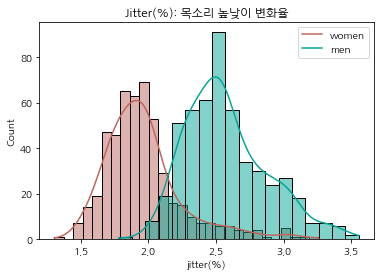

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family = 'NanumGothic')

sns.histplot(res_w_grouped['jitter(%)'], kde=True, color = "#BF665E")
sns.histplot(res_m_grouped['jitter(%)'], kde=True, color = "#03A696")
plt.legend(labels=['women', 'men'])
plt.title('Jitter(%): 목소리 높낮이 변화율')

Text(0.5, 1.0, 'Shimmer(%): 목소리 크기 변화율')

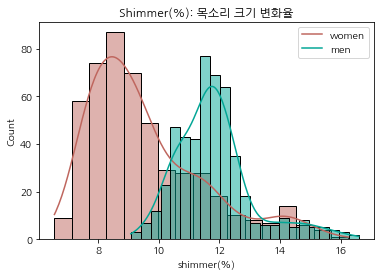

In [12]:
sns.histplot(res_w_grouped['shimmer(%)'], kde=True, color = "#BF665E")
sns.histplot(res_m_grouped['shimmer(%)'], kde=True, color = "#03A696")
plt.legend(labels=['women', 'men'])
plt.title('Shimmer(%): 목소리 크기 변화율')

## 4. 발화자의 성별에 따른 Jitter, Shimmer 적정 범위 계산
- 표준정규분포 가정  

### 4-1. 여성 발화자의 Jitter, Shimmer 90% 범위

In [13]:
import math

j_mean = res_w_grouped[['jitter(%)']].mean()
j_std = res_w_grouped[['jitter(%)']].std()
n = math.sqrt(len(res_w_grouped))

s_mean = res_w_grouped[['shimmer(%)']].mean()
s_std = res_w_grouped[['shimmer(%)']].std()

w_jitter_up_90 = j_mean + (1.645*(j_std/n))
w_jitter_down_90 = j_mean - (1.645*(j_std/n))

w_shimmer_up_90 = s_mean + (1.645*(s_std/n))
w_shimmer_down_90 = s_mean - (1.645*(s_std/n))

print(">>>> women jitter -90% ~ 90% = "+str(w_jitter_down_90[0])+" ~ "+str(w_jitter_up_90[0]))
print(">>>> women shimmer -90% ~ 90% = "+str(w_shimmer_down_90[0])+" ~ "+str(w_shimmer_up_90[0]))

>>>> women jitter -90% ~ 90% = 1.9410411656666546 ~ 1.9839553632704805
>>>> women shimmer -90% ~ 90% = 9.41037437787132 ~ 9.691057506528201


In [14]:
j_mean = res_m_grouped[['jitter(%)']].mean()
j_std = res_m_grouped[['jitter(%)']].std()
n = math.sqrt(len(res_m_grouped))

s_mean = res_m_grouped[['shimmer(%)']].mean()
s_std = res_m_grouped[['shimmer(%)']].std()

w_jitter_up_90 = j_mean + (1.645*(j_std/n))
w_jitter_down_90 = j_mean - (1.645*(j_std/n))

w_shimmer_up_90 = s_mean + (1.645*(s_std/n))
w_shimmer_down_90 = s_mean - (1.645*(s_std/n))

print(">>>> men jitter -90% ~ 90% = "+str(w_jitter_down_90[0])+" ~ "+str(w_jitter_up_90[0]))
print(">>>> men shimmer -90% ~ 90% = "+str(w_shimmer_down_90[0])+" ~ "+str(w_shimmer_up_90[0]))

>>>> men jitter -90% ~ 90% = 2.5534317149470627 ~ 2.5981746325747292
>>>> men shimmer -90% ~ 90% = 11.724315919535046 ~ 11.9137985149271
